In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


#### Data Reading and Understanding

In [2]:
lead =  pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
##checking shape of the dataset
lead.shape

(9240, 37)

There are 9240 rows and 37 columns

In [4]:
#checking non null count and datatype of the variables
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Data Cleaning and Preparation

In [5]:
##Checking null values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
# percentage of missing values in each column
round(lead.isnull().sum()/len(lead.index), 2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [7]:
#Describing the data
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Handling the 'Select' level that is present in many of the categorical variables.

In [8]:
# Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)

In [9]:
# percentage of missing values in each column
round(lead.isnull().sum()/len(lead.index), 2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [10]:
# dropping the columns with missing values greater than 40% .
lead=lead.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','City',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [11]:
# percentage of missing values in each column
round(lead.isnull().sum()/len(lead.index), 2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [12]:
## The variables Prospect ID and Lead Number won't be of any use in the analysis, so it's best that we drop these two variables

lead.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [13]:
# percentage of missing values in each column
round(lead.isnull().sum()/len(lead.index), 2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

#### Column 1 : Specialization
Specialization has 37% of missing values which is Categorical so imputing it with mode.


In [14]:
lead['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [15]:
lead['Specialization'].mode()[0]

'Finance Management'

In [16]:
lead['Specialization'] = lead['Specialization'].fillna(lead['Specialization'].mode()[0])

In [17]:
lead['Specialization'].value_counts()

Specialization
Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [18]:
# percentage of missing values in each column
round(lead.isnull().sum()/len(lead.index), 2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

#### Column 2: Tags
Tags has 36% missing values and imputing it with mode

In [19]:
lead['Tags'].value_counts()
lead['Tags'].mode()[0]

'Will revert after reading the email'

In [20]:
lead['Tags'] = lead['Tags'].fillna(lead['Tags'].mode()[0])

In [21]:
# percentage of missing values in each column
round(lead.isnull().sum()/len(lead.index), 2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

#### Column 3: What is your current occupation 
It has 29% missing values and imputing with mode

In [22]:
# Finding the percentage of the different categories of this column:
lead['What is your current occupation'].value_counts(normalize = True)*100

What is your current occupation
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: proportion, dtype: float64

In [23]:
###Imputing missing values with mode
lead['What is your current occupation'] = lead['What is your current occupation'].fillna(lead['What is your current occupation'].mode()[0])

In [24]:
# percentage of missing values in each column
round(lead.isnull().sum()/len(lead.index), 2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                   0.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

#### Column 4: What matters most to you in choosing a course

In [25]:
lead['What matters most to you in choosing a course'].value_counts(normalize = True)*100


What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

In [26]:
##Imputing missing values with mode
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna(lead['What matters most to you in choosing a course'].mode()[0])


In [27]:
# percentage of missing values in each column
round(lead.isnull().sum()/len(lead.index), 2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                   0.0
What matters most to you in choosing a course     0.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

#### Column 5: Country

In [28]:
##Imputing mising values with mode
lead['Country'] = lead['Country'].fillna(lead['Country'].mode()[0])

In [29]:
# percentage of missing values in each column
round(lead.isnull().sum()/len(lead.index), 2)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      1.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             1.0
Last Activity                                    1.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [30]:
# Remaining missing values are less than 2% so dropping the rows with null values
lead.dropna(inplace = True)

In [31]:
# percentage of missing values in each column
round(lead.isnull().sum()/len(lead.index), 2)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [32]:
lead.shape

(9074, 27)

In [33]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

#### Exploratory Data Analysis
Univariate Analysis and Bivariate Analysis
1) Converted   
Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [34]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

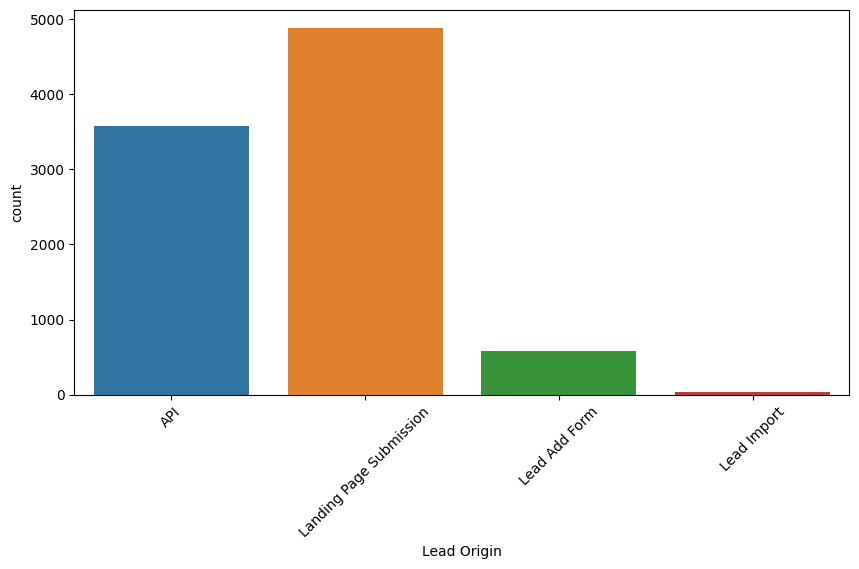

In [35]:
# 2.Lead Origin
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", data = lead)
plt.xticks(rotation = 45)

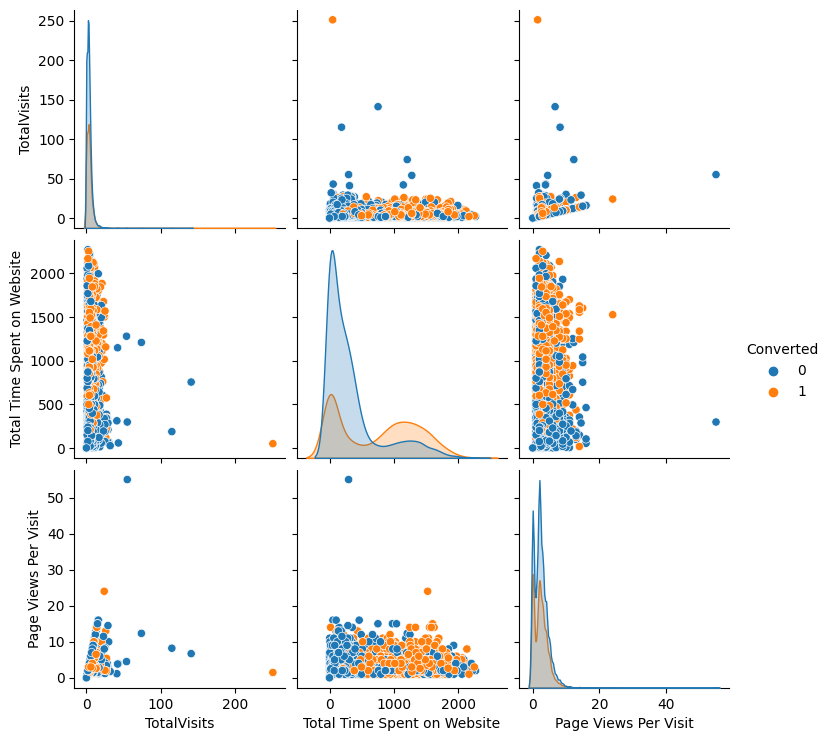

In [36]:
sns.pairplot(lead, diag_kind='kde',hue='Converted')
plt.show()

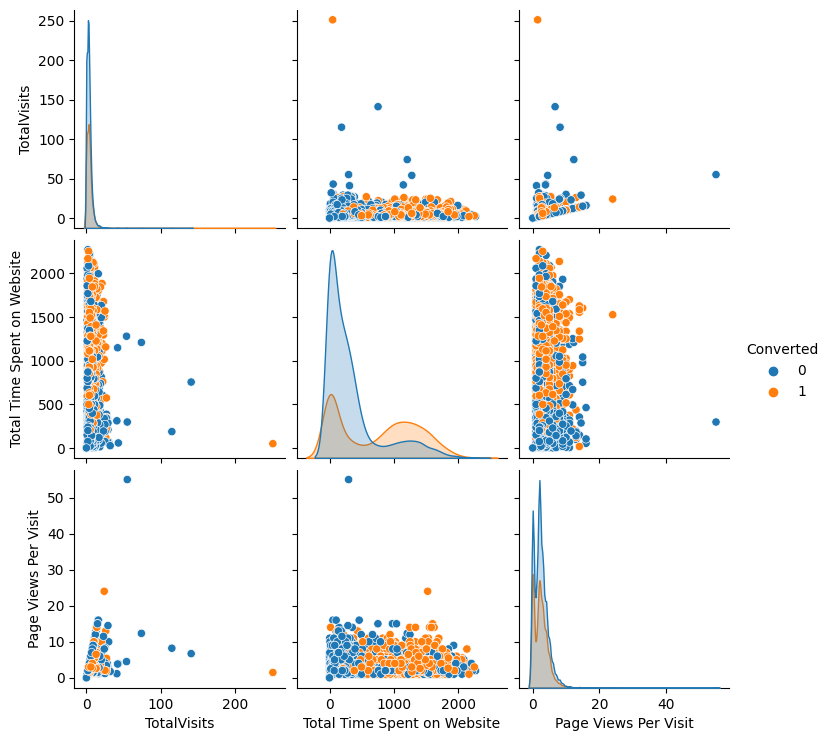

In [37]:
leads = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

In [38]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


In [39]:
for column in lead:
    print(lead[column].astype('category').value_counts())
    print('***********************************************')

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
***********************************************
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
***********************************************
Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
***********************************************
Do Not Call
No     9072
Yes       2
Name: c

In [40]:
###All of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.
lead.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 'What matters most to you in choosing a course',
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [41]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Country                                 9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   object 
 

#### Data Preparation
Converting some Binary variables (Yes/No) to (1/0)

In [42]:
vars =  ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[vars] = lead[vars].apply(binary_map)

In [43]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Will revert after reading the email,0,Modified


In [44]:
lead_car_data = lead.select_dtypes(include=["object"])
lead_car_data.head()

,Lead Origin,Lead Source,Last Activity,Country,Specialization,What is your current occupation,Tags,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,India,Finance Management,Unemployed,Interested in other courses,Modified
1,API,Organic Search,Email Opened,India,Finance Management,Unemployed,Ringing,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,Student,Will revert after reading the email,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,India,Media and Advertising,Unemployed,Ringing,Modified
4,Landing Page Submission,Google,Converted to Lead,India,Finance Management,Unemployed,Will revert after reading the email,Modified


In [45]:
lead_dummy = pd.get_dummies(lead_car_data, dtype = int,  drop_first = True)
lead_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
lead_df = pd.concat([lead, lead_dummy], axis = 1)

In [47]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Finance Management,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,...,0,0,1,0,0,0,0,0,0,0


In [48]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=152)

In [49]:
##We have created dummies for the below variables, so we can drop them

lead_df = lead_df.drop(['Lead Origin','Lead Source','Last Activity', 'Country','Specialization','What is your current occupation','Tags','Last Notable Activity'], axis = 1)

In [50]:
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Test-Train Split
The next step is to split the dataset into training an testing sets.

In [51]:
from sklearn.model_selection import train_test_split

X = lead_df.drop(['Converted'], axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
# Putting  the target variable in y

y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


#### Scaling the features

In [54]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [55]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0.007968,0.178347,0.083333,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0.007968,0.085355,0.083333,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0.007968,0.619946,0.083333,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.019920,0.711590,0.104167,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
# Checking the Converted rate
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

#### Looking at Correlations

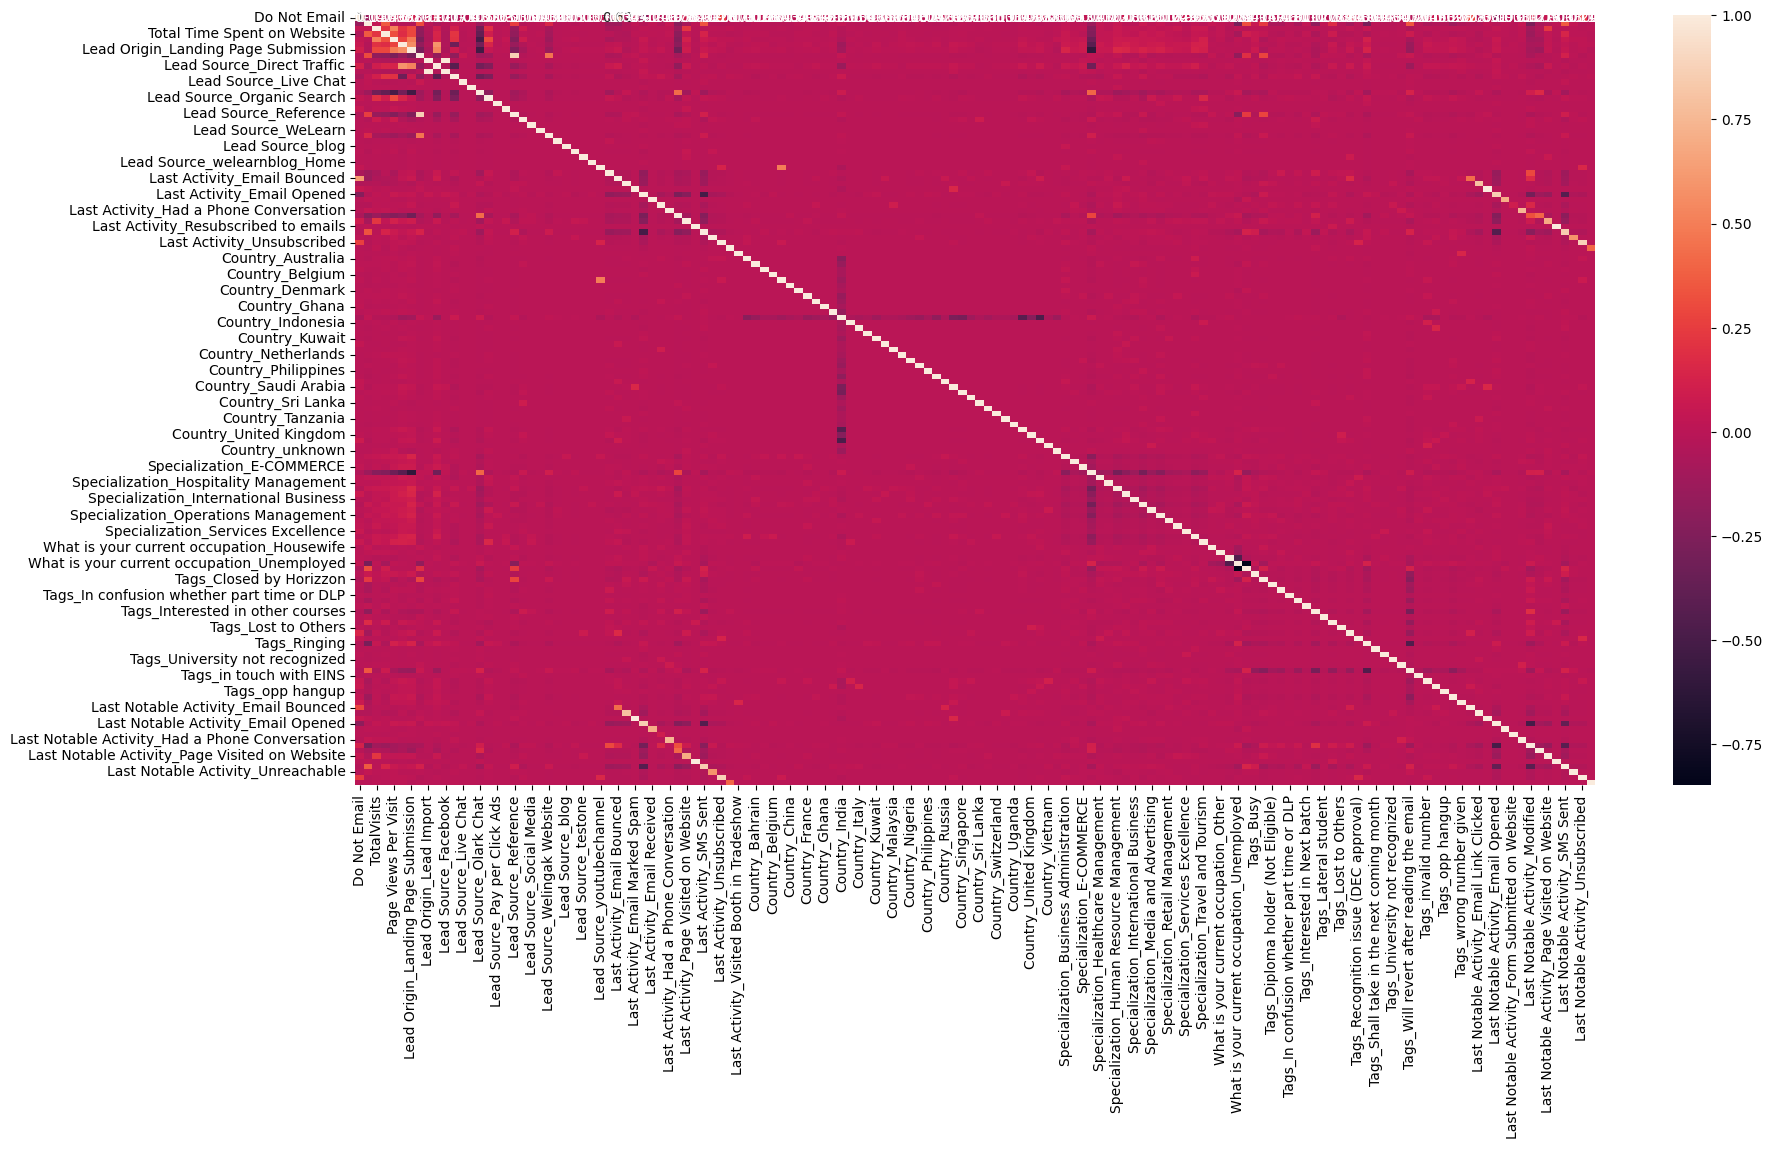

In [57]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

#### Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [58]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [59]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [60]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False,

In [61]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 54),
 ('A free copy of Mastering The Interview', False, 85),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', False, 92),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Live Chat', False, 91),
 ('Lead Source_NC_EDM', False, 68),
 ('Lead Source_Olark Chat', False, 67),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Pay per Click Ads', False, 120),
 ('Lead Source_Press_Release', False, 73),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Social Media', False, 50),
 ('Lead Source_WeLearn', False, 128),
 ('Lead Source_Welingak Website', False, 4),
 ('Lead Source_bing', False, 96),
 ('Lead Source_blog', False, 39),
 ('Lead Source_google', False

In [62]:
# Putting all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [63]:
# Selecting only the columns selected by RFE

X_train = X_train[col]

In [64]:
# Import statsmodels
import statsmodels.api as sm

In [65]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1743.0
Date:                Wed, 10 Jan 2024   Deviance:                       3486.1
Time:                        12:11:05   Pearson chi2:                 1.18e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5435
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8725      0.339    -11.423      0.000      -4.537      -3.208
Do Not Email                                            -1.8809      0.215     -8.735      0.000      -2.303      -1.459
Total Time Spent on Website                              4.3879      0.187     23.472      0.000       4.022       4.754
Lead Origin_Lead Add Form                                3.8075      0.268     14.226      0.000       3.283       4.332
Lead Origin_Lead Import                                  2.1457      0.614      3.492      0.000       0.941       3.350
Last Activity_Had a Phone Conversation                   2.9909      1.032      2.899      0.004       0.969       5.013
Last Activity_Unsubscribed                               2.0873      0.613      3.404      0.001       0.886       3.289
What is your current occupation_Unemployed              -1.5692      0.311     -5.054      0.000      -2.178      -0.961
What is your current occupation_Working Professional     1.3050      0.393      3.319      0.001       0.534       2.076
Tags_Busy                                                2.8844      0.314      9.187      0.000       2.269       3.500
Tags_Closed by Horizzon                                  8.2740      0.755     10.964      0.000       6.795       9.753
Tags_Lost to EINS                                        8.2129      0.752     10.923      0.000       6.739       9.687
Tags_Ringing                                            -1.6186      0.327     -4.950      0.000      -2.259      -0.978
Tags_Will revert after reading the email                 3.6797      0.206     17.845      0.000       3.276       4.084
Tags_switched off                                       -1.0934      0.568     -1.926      0.054      -2.206       0.019
Last Notable Activity_SMS Sent                           2.7976      0.120     23.239      0.000       2.562       3.034
========================================================================================================================
"""

In [66]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,5.47
12,Tags_Will revert after reading the email,4.45
1,Total Time Spent on Website,2.00
11,Tags_Ringing,1.78
7,What is your current occupation_Working Profes...,1.61
14,Last Notable Activity_SMS Sent,1.55
2,Lead Origin_Lead Add Form,1.33
9,Tags_Closed by Horizzon,1.33
0,Do Not Email,1.16
13,Tags_switched off,1.16


In [68]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [69]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1756.2
Date:                Wed, 10 Jan 2024   Deviance:                       3512.5
Time:                        12:11:22   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5416
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3098      0.213    -24.938      0.000      -5.727      -4.892
Do Not Email                                            -1.8331      0.213     -8.601      0.000      -2.251      -1.415
Total Time Spent on Website                              4.4173      0.187     23.683      0.000       4.052       4.783
Lead Origin_Lead Add Form                                3.8315      0.265     14.455      0.000       3.312       4.351
Lead Origin_Lead Import                                  2.1187      0.613      3.458      0.001       0.918       3.320
Last Activity_Had a Phone Conversation                   2.9627      1.033      2.869      0.004       0.939       4.987
Last Activity_Unsubscribed                               2.0080      0.611      3.285      0.001       0.810       3.206
What is your current occupation_Working Professional     2.8193      0.256     11.001      0.000       2.317       3.322
Tags_Busy                                                2.7644      0.311      8.898      0.000       2.155       3.373
Tags_Closed by Horizzon                                  8.1452      0.753     10.820      0.000       6.670       9.621
Tags_Lost to EINS                                        8.0845      0.751     10.770      0.000       6.613       9.556
Tags_Ringing                                            -1.7477      0.325     -5.384      0.000      -2.384      -1.111
Tags_Will revert after reading the email                 3.5726      0.203     17.594      0.000       3.175       3.971
Tags_switched off                                       -1.2189      0.566     -2.152      0.031      -2.329      -0.109
Last Notable Activity_SMS Sent                           2.7779      0.120     23.183      0.000       2.543       3.013
========================================================================================================================
"""

In [70]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,1.90
1,Total Time Spent on Website,1.87
13,Last Notable Activity_SMS Sent,1.54
2,Lead Origin_Lead Add Form,1.32
8,Tags_Closed by Horizzon,1.20
6,What is your current occupation_Working Profes...,1.18
10,Tags_Ringing,1.15
0,Do Not Email,1.13
5,Last Activity_Unsubscribed,1.08
7,Tags_Busy,1.06


#### Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [71]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.272996
1012    0.402689
9226    0.000858
4750    0.977153
7987    0.997251
1281    0.951442
2880    0.147523
4971    0.962328
7536    0.894451
1248    0.016153
dtype: float64

In [72]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.72996150e-01, 4.02688833e-01, 8.57808649e-04, 9.77152836e-01,
       9.97250686e-01, 9.51441620e-01, 1.47522645e-01, 9.62328065e-01,
       8.94450584e-01, 1.61532382e-02])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities.

In [73]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.272996
1,0,0.402689
2,0,0.000858
3,1,0.977153
4,1,0.997251


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [74]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.272996,0
1,0,0.402689,0
2,0,0.000858,0
3,1,0.977153,1
4,1,0.997251,1


#### Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.


In [75]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

In [76]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3637  268]
 [ 379 2067]]


In [77]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8981262793260903


 Predicted     not_converted    converted
 Actual
 not_converted       3637      268
 converted            379       2067  

In [78]:
# Let's evaluate the other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [79]:
# Calculate the sensitivity
TP/(TP+FN)

0.8450531479967294

In [80]:
# Calculate the specificity
TN/(TN+FP)

0.9313700384122919

### Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [81]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

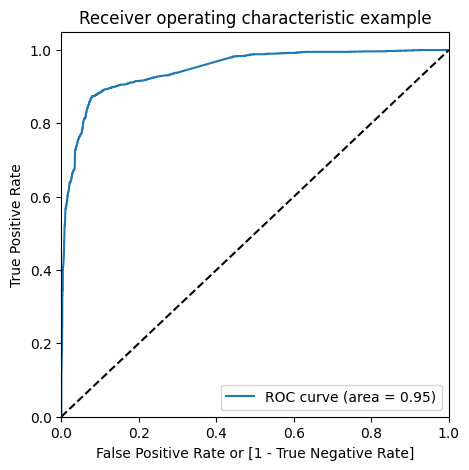

In [83]:
# Calling the ROC function.
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.95 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

#### Finding Optimal Cutoff Point¶
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.272996,0,1,1,1,0,0,0,0,0,0,0
1,0,0.402689,0,1,1,1,1,1,0,0,0,0,0
2,0,0.000858,0,1,0,0,0,0,0,0,0,0,0
3,1,0.977153,1,1,1,1,1,1,1,1,1,1,1
4,1,0.997251,1,1,1,1,1,1,1,1,1,1,1


In [85]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.715320  0.983238  0.547503
0.2   0.2  0.843017  0.916190  0.797183
0.3   0.3  0.892458  0.888798  0.894750
0.4   0.4  0.902220  0.872854  0.920615
0.5   0.5  0.898126  0.845053  0.931370
0.6   0.6  0.888836  0.802126  0.943150
0.7   0.7  0.875768  0.742437  0.959283
0.8   0.8  0.842230  0.621832  0.980282
0.9   0.9  0.810266  0.521259  0.991293


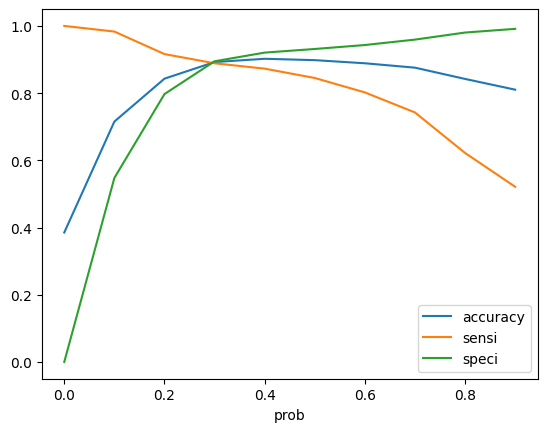

In [86]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see that around 0.3, we get the optimal values of the three metrics. So let's choose 0.3 as our cutoff now.

In [87]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.272996,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.402689,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.000858,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.977153,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.997251,1,1,1,1,1,1,1,1,1,1,1,1


In [88]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8924578806487168

In [89]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3494,  411],
       [ 272, 2174]], dtype=int64)

In [90]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [91]:
# Calculate Sensitivity
TP/(TP+FN)

0.8887980376124285

In [92]:
# Calculate Specificity

TN/(TN+FP)

0.8947503201024328

#### Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [93]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [94]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Had a Phone Conversation,Last Activity_Unsubscribed,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
3271,0,0.070530,0,0,0,0,1,0,0,0,0,0,1,0,0
1490,0,0.679695,0,0,0,0,0,1,0,0,0,0,1,0,0
7936,0,0.033243,0,0,0,0,1,0,0,0,0,0,1,0,0
4216,0,0.000000,1,0,0,0,0,0,0,1,0,0,0,0,0
3830,0,0.073675,0,0,0,0,1,0,0,0,0,0,1,0,0


In [95]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [96]:
# Check X_test_sm
X_test_sm

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Had a Phone Conversation,Last Activity_Unsubscribed,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
3271,1.0,0,0.070530,0,0,0,0,1,0,0,0,0,0,1,0,0
1490,1.0,0,0.679695,0,0,0,0,0,1,0,0,0,0,1,0,0
7936,1.0,0,0.033243,0,0,0,0,1,0,0,0,0,0,1,0,0
4216,1.0,0,0.000000,1,0,0,0,0,0,0,1,0,0,0,0,0
3830,1.0,0,0.073675,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0,0.372417,0,0,0,0,1,0,0,0,0,0,1,0,0
2879,1.0,0,0.264600,0,0,0,0,1,0,0,0,0,0,0,0,0
6501,1.0,0,0.599730,0,0,0,0,0,0,0,0,0,0,1,0,1
7155,1.0,0,0.231357,0,0,0,0,1,0,0,0,0,0,1,0,0


In [97]:
# Drop the required columns from X_test as well
X_test.drop(['What is your current occupation_Unemployed'],axis =  1, inplace = True)

In [98]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.189607
1490    0.983609
7936    0.165732
4216    0.999728
3830    0.191736
1800    0.779349
6507    0.017838
4821    0.005537
4223    0.992178
4714    0.146534
dtype: float64

In [99]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [100]:
# Let's see the head
y_pred_1.head()

,0
3271,0.189607
1490,0.983609
7936,0.165732
4216,0.999728
3830,0.191736


In [101]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [102]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [103]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [104]:
# Checking 'y_pred_final'
y_pred_final.head()

,Converted,0
0,0,0.189607
1,1,0.983609
2,0,0.165732
3,1,0.999728
4,0,0.191736


In [105]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [106]:
# Make predictions on the test set using 0.3 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [107]:
# Checking y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.189607,0
1,1,0.983609,1
2,0,0.165732,0
3,1,0.999728,1
4,0,0.191736,0


In [108]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8817480719794345

In [109]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1541,  193],
       [ 129,  860]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Calculate sensitivity
TP / float(TP+FN)

0.8695652173913043

In [112]:
# Calculate specificity
TN / float(TN+FP)

0.8886966551326413

#### Precision-Recall
Let's now also build the training model using the precision-recall view

In [113]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3637,  268],
       [ 379, 2067]], dtype=int64)

#### Precision
TP / TP + FP

In [114]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8852248394004283

#### Recall
TP / TP + FN

In [115]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8450531479967294

#### Precision and recall tradeoff

In [116]:
from sklearn.metrics import precision_recall_curve

In [117]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [119]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

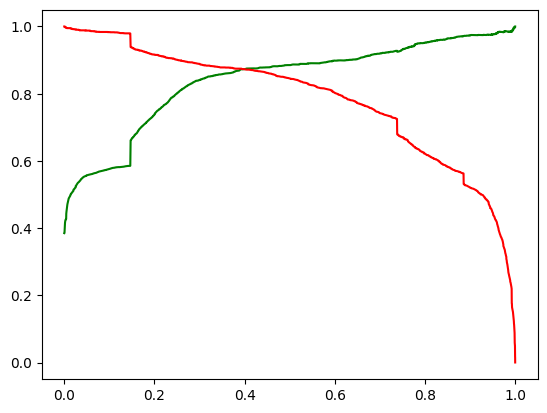

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.272996,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.402689,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.000858,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.977153,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.997251,1,1,1,1,1,1,1,1,1,1,1,1


In [122]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9022201228153047

In [123]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3595,  310],
       [ 311, 2135]], dtype=int64)

In [124]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Calculate Precision

TP/(TP+FP)

0.8732106339468303

In [126]:
# Calculate Recall

TP/(TP+FN)

0.8728536385936222